In [22]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [23]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline
pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
pl.rcParams['xtick.labelsize'] = 7
pl.rcParams['ytick.labelsize'] = 7
pl.rcParams['axes.labelsize'] = 7
!mkdir ../img

# needs to find the library of functions
sys.path.append('../../../../code/')  # to be replaced!

import utils as ut
import plots as pt

mkdir: cannot create directory ‘../img’: File exists


In [24]:
NOTEBOOK_NAME = 'tuning_stability_SSO_day2'

In [25]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
#load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [26]:
vars_SS = {}
folder = '../sucroseAndShock/notebooks/autorestore/preprocessing_SucroseAndShock/'
for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'licks',
            'is_rewardt', 'is_shockt',
            'CYCLE_START',
            'US_START', 'US_DURATION', 'US_END'): 
    vars_SS.update({var:ut.load_variable(var, folder=folder)})
selectivity_SS = {}
selectivity_SS.update(ut.load_variable('selectivity', '../sucroseAndShock/notebooks/autorestore/selectivity_SucroseAndShock/'))


vars_O = {}
folder = '../odors/notebooks/autorestore/preprocessing_Odors/'
for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'licks',
            'is_femalet', 'is_coyotet',
            'CYCLE_START',
            'US_START', 'US_DURATION', 'US_END'): 
    vars_O.update({var:ut.load_variable(var, folder=folder)})
selectivity_O = {}
selectivity_O.update(ut.load_variable('selectivity', '../odors/notebooks/autorestore/selectivity_Odors/'))


In [27]:
input_CellReg_filename = '../../data/CellReg/SSO_day2/cellreg.txt'

In [28]:
output_filename = input_CellReg_filename.split('.')[0]+'cellregSSO_dict.txt'
with open(input_CellReg_filename, 'r') as f:
    header = f.readline()
sessions = header.split()[1:]
cellreg = np.loadtxt(input_CellReg_filename)

#cellreg_dict = dict(zip(sessions, [map(int, c) for c in cellreg.T]))
cellreg_dict = dict(zip(['SS', 'O'], [map(int, c) for c in cellreg.T]))

import json
with open(output_filename, 'w+') as f:
    json.dump(cellreg_dict, f)

In [29]:
conditions = ['O', 'SS']
cellregs = dict(zip(conditions, [ut.load_cellreg_dict('cellregSSO_dict.txt', c) for c in conditions]))

In [30]:
cellregs

{'O': array([ 4, 18, 39, 47, 17, 30, 14,  5,  0, 24, 34, 10,  1, 11, 15, 31, 16,
        29, 48,  2, 44, 25, 49, 12, 23, 51, 55, 26, 69,  7, 36, 22, 21, 13,
         9, 35, 28, 46, 75, 52, 42, 20, 45, 68, 43, 37, 58, 32, 40, 64, 19,
        59, 27, 41, 56, 63, 53, 54, 77,  3, 57]),
 'SS': array([ 1,  2,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 37, 38, 39, 40, 42,
        46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 66,
        69, 71, 72, 74, 75, 81, 82, 84, 95, 97])}

In [31]:
selectivity_SS.keys()

['reward_4s_pre',
 'shock_us',
 'reward_late',
 'reward_4s_us',
 'shock_4s_pre',
 'shock_pre',
 'shock_4s_us',
 'reward_pre',
 'shock_late',
 'reward_us']

In [32]:
pvalues_Rew = ut.adjust_pvalues([s[0][-1] for s in selectivity_SS['reward_4s_us']])
pvalues_Female = ut.adjust_pvalues([s[0][-1] for s in selectivity_O['female_4s_us']])
pvalues_Shock = ut.adjust_pvalues([s[0][-1] for s in selectivity_SS['shock_4s_us']])
pvalues_Coyote = ut.adjust_pvalues([s[0][-1] for s in selectivity_O['coyote_4s_us']])
pvalues_SS_baseRew = ut.adjust_pvalues([s[0][-1] for s in selectivity_SS['reward_4s_pre']])
pvalues_O_baseRew = ut.adjust_pvalues([s[0][-1] for s in selectivity_O['female_4s_pre']])
pvalues_SS_baseShock = ut.adjust_pvalues([s[0][-1] for s in selectivity_SS['shock_4s_pre']])
pvalues_O_baseShock = ut.adjust_pvalues([s[0][-1] for s in selectivity_O['coyote_4s_pre']])

[2, 0, 10]
[3, 0, 11]


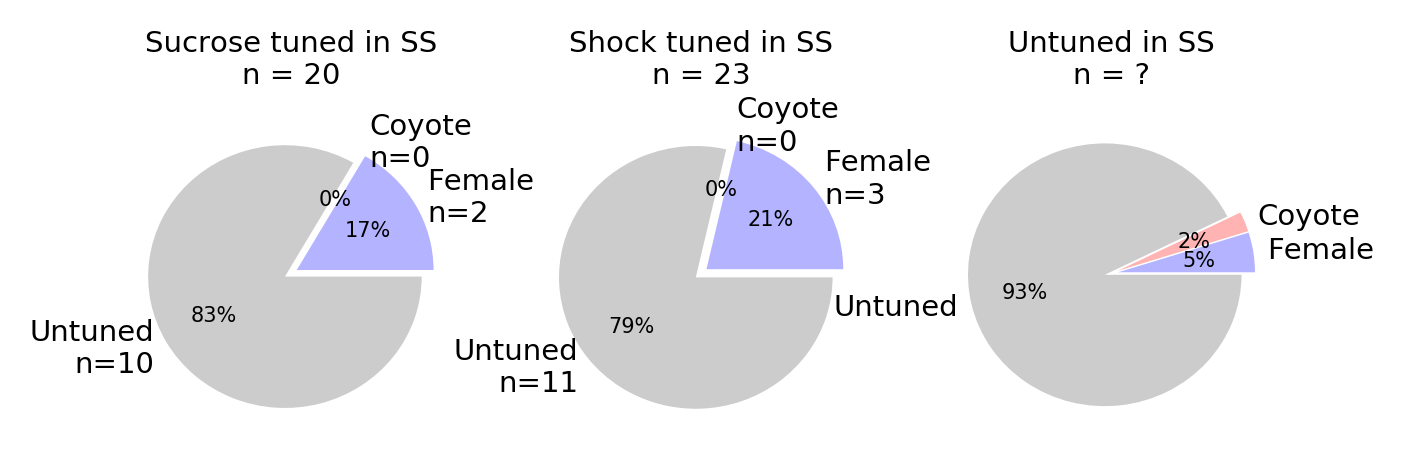

In [33]:
pvalue = 0.01

fig, axs = pl.subplots(1, 3, figsize=(5, 1.45))

for pv, ax in zip([pvalues_Rew, pvalues_Shock], axs):
    which_SS = pv[cellregs['SS']] < pvalue
    print [((pvalues_Female[cellregs['O']]<pvalue)*which_SS).sum(),
            ((pvalues_Coyote[cellregs['O']]<pvalue)*which_SS).sum(),
#            ((pvalues_O_baseRew[cellregs['O']]<pvalue)*which_SS).sum(),
            (np.prod([(ppv[cellregs['O']]>=pvalue)*which_SS
              for ppv in [pvalues_Female, pvalues_Coyote]], 0)).sum()]
    ax.pie([((pvalues_Female[cellregs['O']]<pvalue)*which_SS).sum(),
            ((pvalues_Coyote[cellregs['O']]<pvalue)*which_SS).sum(),
#            ((pvalues_O_baseRew[cellregs['O']]<pvalue)*which_SS).sum(),
            (np.prod([(ppv[cellregs['O']]>=pvalue)*which_SS
              for ppv in [pvalues_Female, pvalues_Coyote]], 0)).sum()],
           colors=[(0.7, 0.7, 1), (1, 0.7, 0.7), (0.8, 0.8, 0.8)], explode=[0.05]*3,
           autopct=lambda x: "%.f%%"%(x),
           labels=['Female\nn=%d' % (((pvalues_Female[cellregs['O']]<pvalue)*which_SS).sum()), 'Coyote\nn=%d' % (((pvalues_Coyote[cellregs['O']]<pvalue)*which_SS).sum()), 'Untuned\nn=%d' % (((np.prod([(ppv[cellregs['O']]>=pvalue)*which_SS
              for ppv in [pvalues_Female, pvalues_Coyote]], 0)).sum()))], textprops={'fontsize':5})
which_SS = (np.prod([(ppv[cellregs['SS']]>=pvalue)
              for ppv in [pvalues_Rew, pvalues_Shock]], 0)) > 0
axs[-1].pie([((pvalues_Female[cellregs['O']]<pvalue)*which_SS).sum(),
        ((pvalues_Coyote[cellregs['O']]<pvalue)*which_SS).sum(),
#        ((pvalues_O_baseRew[cellregs['O']]<pvalue)*which_SS).sum(),
        (np.prod([(ppv[cellregs['O']]>=pvalue)*which_SS
          for ppv in [pvalues_Female, pvalues_Coyote]], 0)).sum()],
       colors=[(0.7, 0.7, 1), (1, 0.7, 0.7), (0.8, 0.8, 0.8)], explode=[0.05]*3,
            autopct=lambda x: "%.f%%"%(x), #TEST FOR PERCENTAGE
       labels=['Female', 'Coyote', 'Untuned'], textprops={'fontsize':5})

Rew_n = pvalues_Rew < pvalue
Shock_n = pvalues_Shock < pvalue

axs[0].set_title('Sucrose tuned in SS\nn = %d' % (len(np.where(Rew_n[True])[1])) , fontsize=7)
axs[1].set_title('Shock tuned in SS\nn = %d' % (len(np.where(Shock_n[True])[1])), fontsize=7)
#axs[2].set_title('SSbaseline sucrose tuned in SS', fontsize=7)
axs[2].set_title('Untuned in SS\nn = ?', fontsize=7)

[2, 3, 2]
[0, 0, 1]


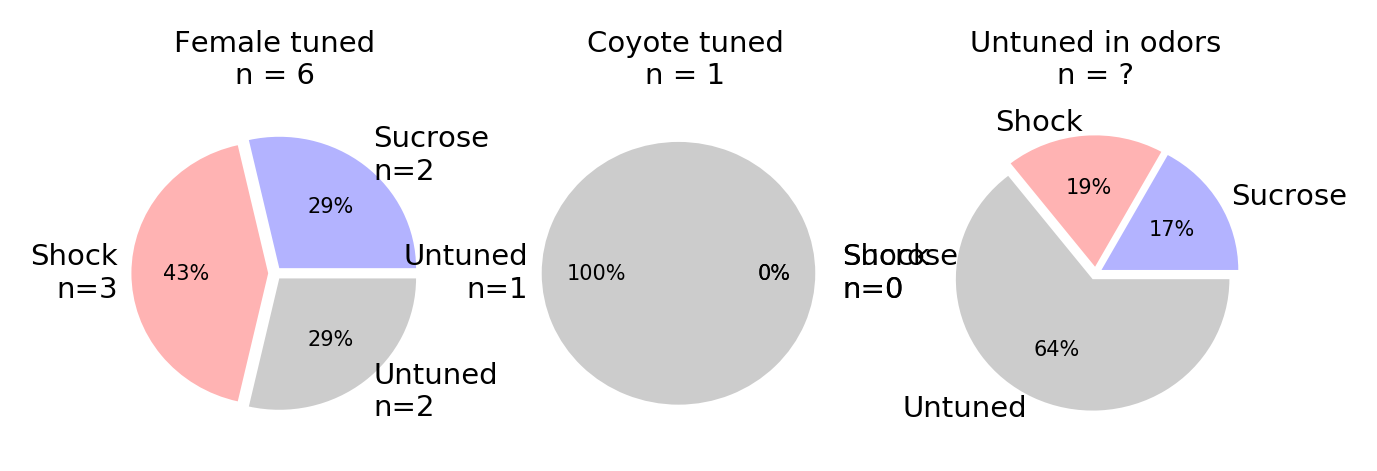

In [42]:
pvalue = 0.01

fig, axs = pl.subplots(1, 3, figsize=(5, 1.45))

for pv, ax in zip([pvalues_Female, pvalues_Coyote], axs):
    which_O = pv[cellregs['O']] < pvalue
    print [((pvalues_Rew[cellregs['SS']]<pvalue)*which_O).sum(),
            ((pvalues_Shock[cellregs['SS']]<pvalue)*which_O).sum(),
#            ((pvalues_SS_baseRew[cellregs['SS']]<pvalue)*which_O).sum(),
            (np.prod([(ppv[cellregs['SS']]>=pvalue)*which_O
              for ppv in [pvalues_Rew, pvalues_Shock]], 0)).sum()]
    ax.pie([((pvalues_Rew[cellregs['SS']]<pvalue)*which_O).sum(),
            ((pvalues_Shock[cellregs['SS']]<pvalue)*which_O).sum(),
#            ((pvalues_SS_baseRew[cellregs['SS']]<pvalue)*which_O).sum(),
            (np.prod([(ppv[cellregs['SS']]>=pvalue)*which_O
              for ppv in [pvalues_Rew, pvalues_Shock]], 0)).sum()],
           colors=[(0.7, 0.7, 1), (1, 0.7, 0.7), (0.8, 0.8, 0.8)], explode=[0.05]*3,
           autopct=lambda x: "%.f%%"%(x),
           labels=['Sucrose\nn=%d' % (((pvalues_Rew[cellregs['SS']]<pvalue)*which_O).sum()), 'Shock\nn=%d' % (((pvalues_Shock[cellregs['SS']]<pvalue)*which_O).sum()), 'Untuned\nn=%d' % ((np.prod([(ppv[cellregs['SS']]>=pvalue)*which_O
              for ppv in [pvalues_Rew, pvalues_Shock]], 0)).sum())], textprops={'fontsize':5})
which_O = (np.prod([(ppv[cellregs['O']]>=pvalue)
              for ppv in [pvalues_Female, pvalues_Coyote]], 0)) > 0
axs[-1].pie([((pvalues_Rew[cellregs['SS']]<pvalue)*which_O).sum(),
        ((pvalues_Shock[cellregs['SS']]<pvalue)*which_O).sum(),
#        ((pvalues_SS_baseRew[cellregs['SS']]<pvalue)*which_O).sum(),
        (np.prod([(ppv[cellregs['SS']]>=pvalue)*which_O
          for ppv in [pvalues_Rew, pvalues_Shock]], 0)).sum()],
       colors=[(0.7, 0.7, 1), (1, 0.7, 0.7), (0.8, 0.8, 0.8)], explode=[0.05]*3,
            autopct=lambda x: "%.f%%"%(x),
       labels=['Sucrose', 'Shock', 'Untuned'], textprops={'fontsize':5})

Female_n = pvalues_Female < pvalue
Coyote_n = pvalues_Coyote < pvalue
    
axs[0].set_title('Female tuned\nn = %d' % (len(np.where(Female_n[True])[1])) , fontsize=7)
axs[1].set_title('Coyote tuned\nn = %d' % (len(np.where(Coyote_n[True])[1])) , fontsize=7)
#axs[2].set_title('US+ tuned in O', fontsize=7)
axs[2].set_title('Untuned in odors\nn = ?', fontsize=7)

In [43]:
tuning_confusion = np.zeros((3, 3))
# This is for determining the tuning of SS-selective cells during O
# simply another way of reSSsenting the info in the above pie charts
for i, pv in enumerate([pvalues_Rew, pvalues_Shock]):
    which_SS = pv[cellregs['SS']] < pvalue
    for j, ppv in enumerate([pvalues_Female, pvalues_Coyote]):
        tuning_confusion[i][j] = ((ppv[cellregs['O']]<pvalue)*which_SS).sum()
    tuning_confusion[i][-1] = (np.prod([(ppv[cellregs['O']]>=pvalue)*which_SS
                               for ppv in [pvalues_Female, pvalues_Coyote]], 0)).sum()
which_SS = (np.prod([(ppv[cellregs['SS']]>=pvalue)
              for ppv in [pvalues_Rew, pvalues_Shock]], 0)) > 0
for j, ppv in enumerate([pvalues_Female, pvalues_Coyote]):
        tuning_confusion[-1][j] = ((ppv[cellregs['O']]<pvalue)*which_SS).sum()
tuning_confusion[-1][-1] = (np.prod([(ppv[cellregs['O']]>=pvalue)*which_SS
          for ppv in [pvalues_Female, pvalues_Coyote]], 0)).sum()

In [44]:
(tuning_confusion.T/np.sum(tuning_confusion, 1)).T

array([[ 0.16666667,  0.        ,  0.83333333],
       [ 0.21428571,  0.        ,  0.78571429],
       [ 0.04878049,  0.02439024,  0.92682927]])

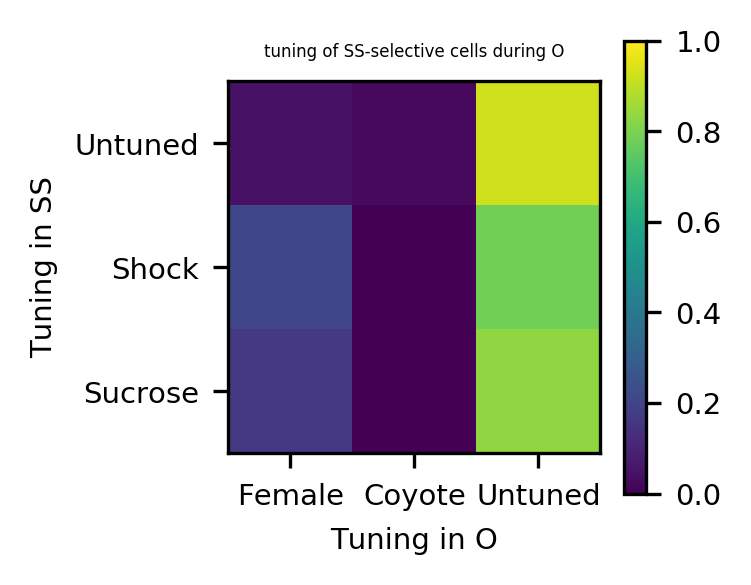

In [45]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
im = ax.imshow((tuning_confusion.T/np.sum(tuning_confusion, 1)).T, origin='lower', vmin=0, vmax=1)
ax.set_xticks(range(3))
ax.set_xticklabels(['Female', 'Coyote', 'Untuned'])
ax.set_yticks(range(3))
ax.set_yticklabels(['Sucrose', 'Shock', 'Untuned'])

ax.set_xlabel('Tuning in O')
ax.set_ylabel('Tuning in SS')

pl.colorbar(im)
pl.title('tuning of SS-selective cells during O', fontsize=4)
fig.savefig('../img/tuning_confusion - SS-selective during O')

In [46]:
tuning_confusion_rev = np.zeros((3, 3))
# This is for determining the tuning of O-selective cells during SS
for i, pv in enumerate([pvalues_Female, pvalues_Coyote]):
    which_O = pv[cellregs['O']] < pvalue
    for j, ppv in enumerate([pvalues_Rew, pvalues_Shock]):
        tuning_confusion_rev[i][j] = ((ppv[cellregs['SS']]<pvalue)*which_O).sum()
    tuning_confusion_rev[i][-1] = (np.prod([(ppv[cellregs['SS']]>=pvalue)*which_O
                               for ppv in [pvalues_Rew, pvalues_Shock]], 0)).sum()
which_O = (np.prod([(ppv[cellregs['O']]>=pvalue)
              for ppv in [pvalues_Female, pvalues_Coyote]], 0)) > 0
for j, ppv in enumerate([pvalues_Rew, pvalues_Shock]):
        tuning_confusion_rev[-1][j] = ((ppv[cellregs['SS']]<pvalue)*which_O).sum()
tuning_confusion_rev[-1][-1] = (np.prod([(ppv[cellregs['SS']]>=pvalue)*which_O
          for ppv in [pvalues_Rew, pvalues_Shock]], 0)).sum()

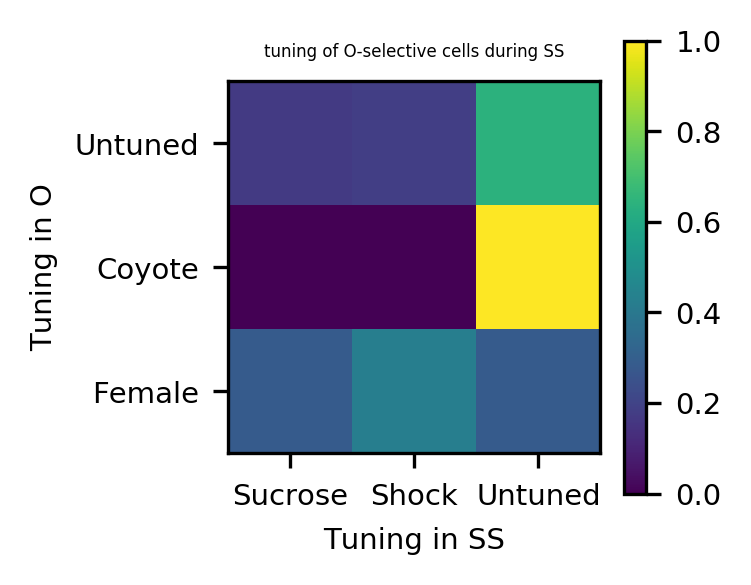

In [47]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
im = ax.imshow((tuning_confusion_rev.T/np.sum(tuning_confusion_rev, 1)).T, origin='lower', vmin=0, vmax=1)
ax.set_xticks(range(3))
ax.set_xticklabels(['Sucrose', 'Shock', 'Untuned'])
ax.set_yticks(range(3))
ax.set_yticklabels(['Female', 'Coyote', 'Untuned'])

ax.set_xlabel('Tuning in SS')
ax.set_ylabel('Tuning in O')

pl.colorbar(im)
pl.title('tuning of O-selective cells during SS', fontsize=4)
fig.savefig('../img/tuning_confusion - O-selective during SS')

In [48]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'json'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
